In [27]:
# tugas regresi linier berganda
# urutan data - y (laba), x1 (penjualan), x2 (harga bahan baku)
laba=[3000000, 4000000, 2000000, 1200000, 5000000, 2000000, 5000000]
jual=[7000000, 10000000, 7500000, 5000000, 17000000, 7000000, 14000000]
h_baku=[325000, 360000, 415000, 520000, 475000, 635000, 700000]

In [45]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

def regmul(data):
    '''
    data[0]:adalah laba -> var. respon -> y
    data[1]:adalah penjualan -> var. prediktor -> x
    data[2]:adalah harga bahan baku -> var. prediktor -> z 
    '''
    n=len(data[0])
    x1_kuadrat=[]
    x2_kuadrat=[]
    for x in data[1]:
        x1_kuadrat.append(pow(x,2))
    for z in data[2]:
        x2_kuadrat.append(pow(z,2))
    x1x2=[]
    x1y=[]
    x2y=[]
    i=0
    while(i<n):
        xx=data[1][i]*data[2][i]
        x1x2.append(xx)
        x1_y=data[1][i]*data[0][i]
        x1y.append(x1_y)
        x2_y=data[2][i]*data[0][i]
        x2y.append(x2_y)
        i=i+1
    jumlah_y=sum(data[0])
    jumlah_x1=sum(data[1])
    jumlah_x2=sum(data[2])
    jumlah_x1kuadrat=sum(x1_kuadrat)
    jumlah_x2kuadrat=sum(x2_kuadrat)
    jumlah_x1x2=sum(x1x2)
    jumlah_x1y=sum(x1y)
    jumlah_x2y=sum(x2y)
    m1=[n, jumlah_x1, jumlah_x2]
    m2=[jumlah_x1, jumlah_x1kuadrat, jumlah_x1x2]
    m3=[jumlah_x2, jumlah_x1x2, jumlah_x2kuadrat]
    mx=np.row_stack([m1, m2, m3])
    my=[jumlah_y, jumlah_x1y, jumlah_x2y]
    mxx=inv(mx)
    beta_topi=np.matmul(mxx, my)
    b0=round(beta_topi[0])
    b1=round(beta_topi[1],4)
    b2=round(beta_topi[2],2)
    print ('nilai koefisien beta adalah :')
    print ('b0=', round(beta_topi[0]))
    print ('b1=', round(beta_topi[1],4))
    print ('b2=', round(beta_topi[2],2))
    print ('persamaan regresinya adalah')
    print ('laba =', b0, '+', b1, 'penjualan', b2, 'h_bahanbaku')
    return (b0, b1, b2)

nilai koefisien beta adalah :
b0= 545824.0
b1= 0.3348
b2= -1.23
persamaan regresinya adalah
laba = 545824.0 + 0.3348 penjualan -1.23 h_bahanbaku
Plot regresi untuk data tsb adalah


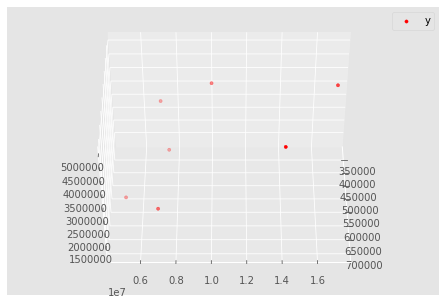

In [48]:
# membuat plot untuk garis regresi
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

def plotregmul(datatoko):
    hregmul=regmul(datatoko)
    print ('Plot regresi untuk data tsb adalah')
    pict=pyplot.figure()
    ax=Axes3D(pict)
    ax.scatter(datatoko[2], datatoko[1], datatoko[0], label='y', s=10, c='r')
    ax.legend()
    ax.view_init(45, 0)
    pict.savefig('plotregmul.png')
    plt.show()
plotregmul([laba, jual, h_baku])